### <span style="color:#20B2AA"> Máster en Tecnologías de Análisis de Datos Masivos: Big Data
***
Minería de datos                                                                 <br>
Profesor: Juan Carlos Vidal Aguiar                                                                                  <br>
Práctica 1                                                                                                              <br>
<br>
Alumna: Irlui Ramírez Hernández                                                                                           <br>
Febrero 2023                                                                                                                <br> 
******* 

#### <span style="color:#20B2AA">   Librerías a implementar           <br>

***

In [408]:
import math
import pandas as pd
import numpy as np
import missingno as mi
import seaborn as sns
import matplotlib.pyplot as plt
#Imputar valores ausentes
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
#Estandarizar con MIN-MAX y Z-Score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Balanceo submuestreo y sobremuestreo
from sklearn.utils import resample
# Balanceo SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline

#### <span style="color:#20B2AA">   Extracción de los datos del fichero echocardiogram.data           <br>
1. Importar la tabla correctamente. Esto implica que las columnas deben tener definidas 
correctamente su nombre y tipo de dato. Se debe mostrar la estructura de la tabla. 
• Los nombres de las columnas mencionadas en el fichero echocardiogram.names 
deben tener los siguientes nombres: Survival, StillAlive, AgeAttack, PericardEffu, 
FracShort, EPSS, LVDD, WMS, WMI, Mult, Name, Group, AliveAt1. 
2. Generar un fichero en formato CSV con la tabla importada y transformada 
correctamente. La tabla tendrá el mismo nombre y la extensión será CSV. El fichero 
creado se deberá entregar junto con la memoria. 
***

##### <span style="color:#20B2AA">Pasos:           <br>
Paso 1: "Nombramos las columnas"    <br>
Paso 2: "Cargar los datos del archivo .date con la librería Pandas"    <br>
Paso 3: "Asignamos las columnas al dataframe datos"    <br>

In [340]:
ruta_archivo = "https://raw.githubusercontent.com/IrluiDev/BigData/main/echocardiogram.data"
usercols = ["Survival", "StillAlive", "AgeAttack", "PericardEffu", 
"FracShort", "EPSS", "LVDD", "WMS", "WMI", "Mult", "Name", "Group", "AliveAt1"]
datos = pd.read_csv(ruta_archivo, header = None)
datos.columns = usercols

##### <span style="color:#20B2AA">Pasos:           <br>
Paso 4: "Generamos un archivo .csv con el nombre echocardiogram y mostramos el dataframe"    <br>

In [323]:
# datos.to_csv("C:/Users/Irlui ma/OneDrive - Universidade de Santiago de Compostela/Documentos/Máster BD USC/Minería de Datos/practica1/echocardiogram.csv")
datos.head()

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0


#### <span style="color:#20B2AA">   Análisis de los datos           <br>
3. Mostrar la distribución de los valores ausentes tanto por columnas como por filas, en el 
caso de que existan, tanto a través de una salida de texto como a través de
representaciones gráficas. 

***

##### <span style="color:#20B2AA">Mostrar la distribución de los  datos ausentes:           <br>
Para los datos ausentes sustituimos el ? por datos ausentes representados por nan para que calcular la distribución    <br>

In [341]:
datos = datos.replace('?', math.nan)
datos

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,NaN,NaN
128,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,NaN,NaN
129,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,NaN,NaN
130,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,NaN,NaN


##### <span style="color:#20B2AA">Contar los valores nulos por columna           <br>

In [268]:
print("Tabla: Total de datos faltantes por columna:")
null_counts = datos.isnull().sum()
null_counts

Tabla: Total de datos faltantes por columna:


Survival         2
StillAlive       1
AgeAttack        5
PericardEffu     1
FracShort        8
EPSS            15
LVDD            11
WMS              4
WMI              1
Mult             4
Name             0
Group           22
AliveAt1        58
dtype: int64

<span style="color:#20B2AA">Podemos visualizar la distribución de los nulos por columnas con la siguiente gráfica: <br>

La columna con más datos nulos es AliveAt1, la columna de clasificación, seguida de "Group" con 22 datos nulos. <br>
La columna "name" no tiene datos nulos y las columnas con menos datos nulos son: <br>
StillAlive, PericardEffu y  WMI<br>

<Axes: >

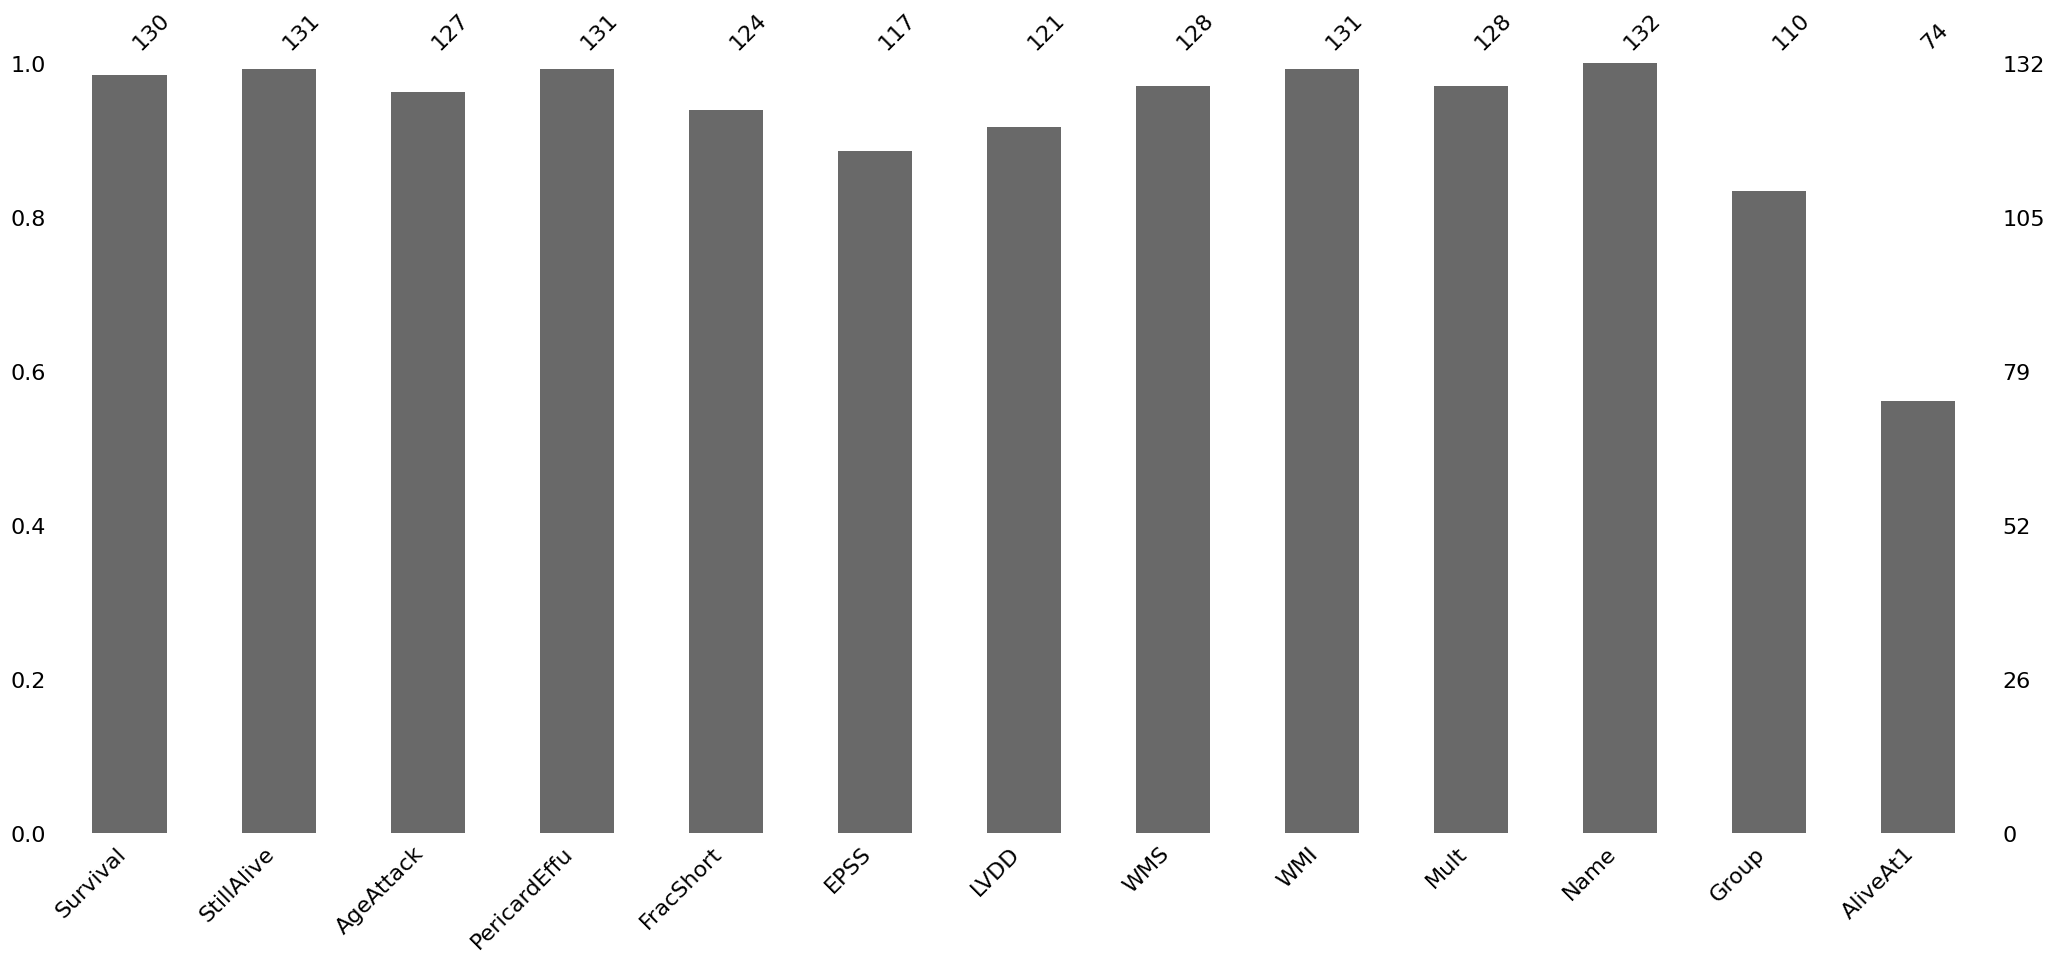

In [166]:
mi.bar(datos)

##### <span style="color:#20B2AA">Contar los valores nulos por filas           <br>
Para conseguirlo se construye la matriz de nulos con datos.isnull() y se recorre con un for por fila para contar sus valores nulos, <br>
se carga el DataFrame de las filas con nulos únicamente y totalizamos las filas sin nulos, las filas con nulos y el total general de datos nulos. <br>

In [139]:
matrizNulos = datos.isnull()
acum= 0
mayor = 0
sinNulos = 0
dic = {}
for fila in range(len(matrizNulos)):
    if (matrizNulos.iloc[fila]==True).sum() > 0:
        nulosFila = (matrizNulos.iloc[fila]==True).sum()
        if (nulosFila >= mayor): 
            mayor = nulosFila
            filaMayor = fila
        dic[fila] = nulosFila
        acum = acum + nulosFila
    else: sinNulos = sinNulos + 1
totalFilasNulos = (len(matrizNulos) - sinNulos)
dfNulos = pd.DataFrame.from_dict(dic, orient='index', columns=['nulosFila'])
print(dfNulos)
print('Total valores nulos: {}\n   - Fila con más valores nulos: #{} con: {} datos nulos.\nTotal general de filas:\n   - No Nulos:{} - Con Nulos: {}'.format(acum, filaMayor, mayor,sinNulos,totalFilasNulos))

     nulosFila
24           1
25           1
26           1
27           3
28           6
..         ...
127          2
128          2
129          2
130          2
131          2

[71 rows x 1 columns]
Total valores nulos: 132
   - Fila con más valores nulos: #49 con: 9 datos nulos.
Total general de filas:
   - No Nulos:61 - Con Nulos: 71


<span style="color:#20B2AA">Podemos visualizar la distribución de los nulos por filas con la siguiente gráfica:

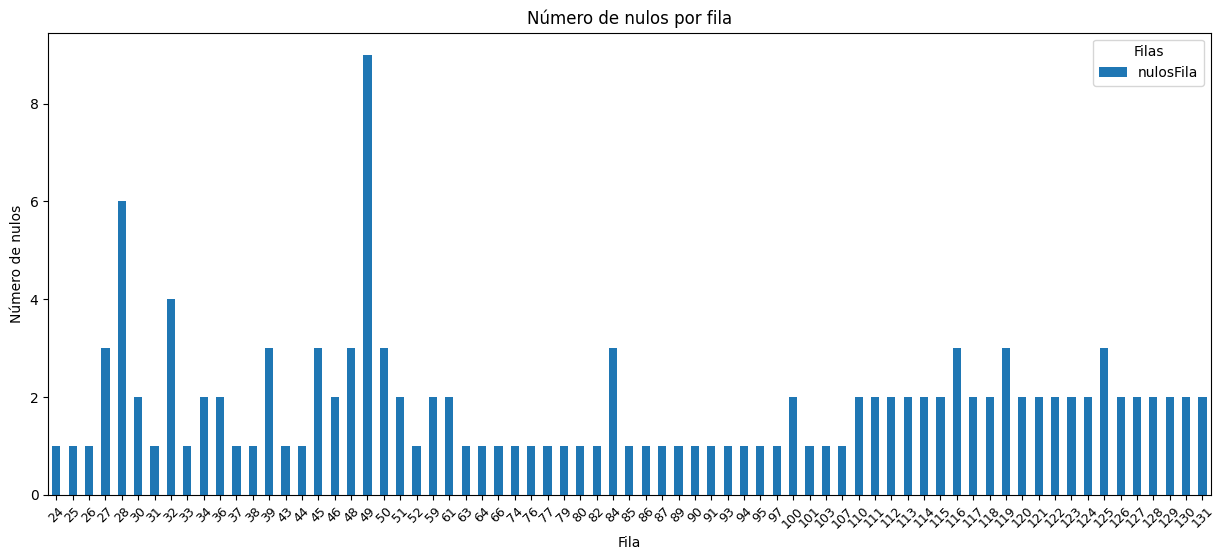

In [148]:
fig, ax = plt.subplots(figsize=(15, 6))
dfNulos.plot(kind='bar', rot=0, ax=ax)
ax.legend(title='Filas')
ax.set_xlabel('Fila')
ax.set_ylabel('Número de nulos')
ax.set_title('Número de nulos por fila')
ax.set_xticklabels(dfNulos.index, rotation=45, fontsize=9)
plt.show()

<span style="color:#20B2AA">Podemos visualizar la distribución de los nulos por filas y columnas con la siguiente gráfica:

GRAFICA #3: VALORES AUSENTES POR COLUMNA Y FILA


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

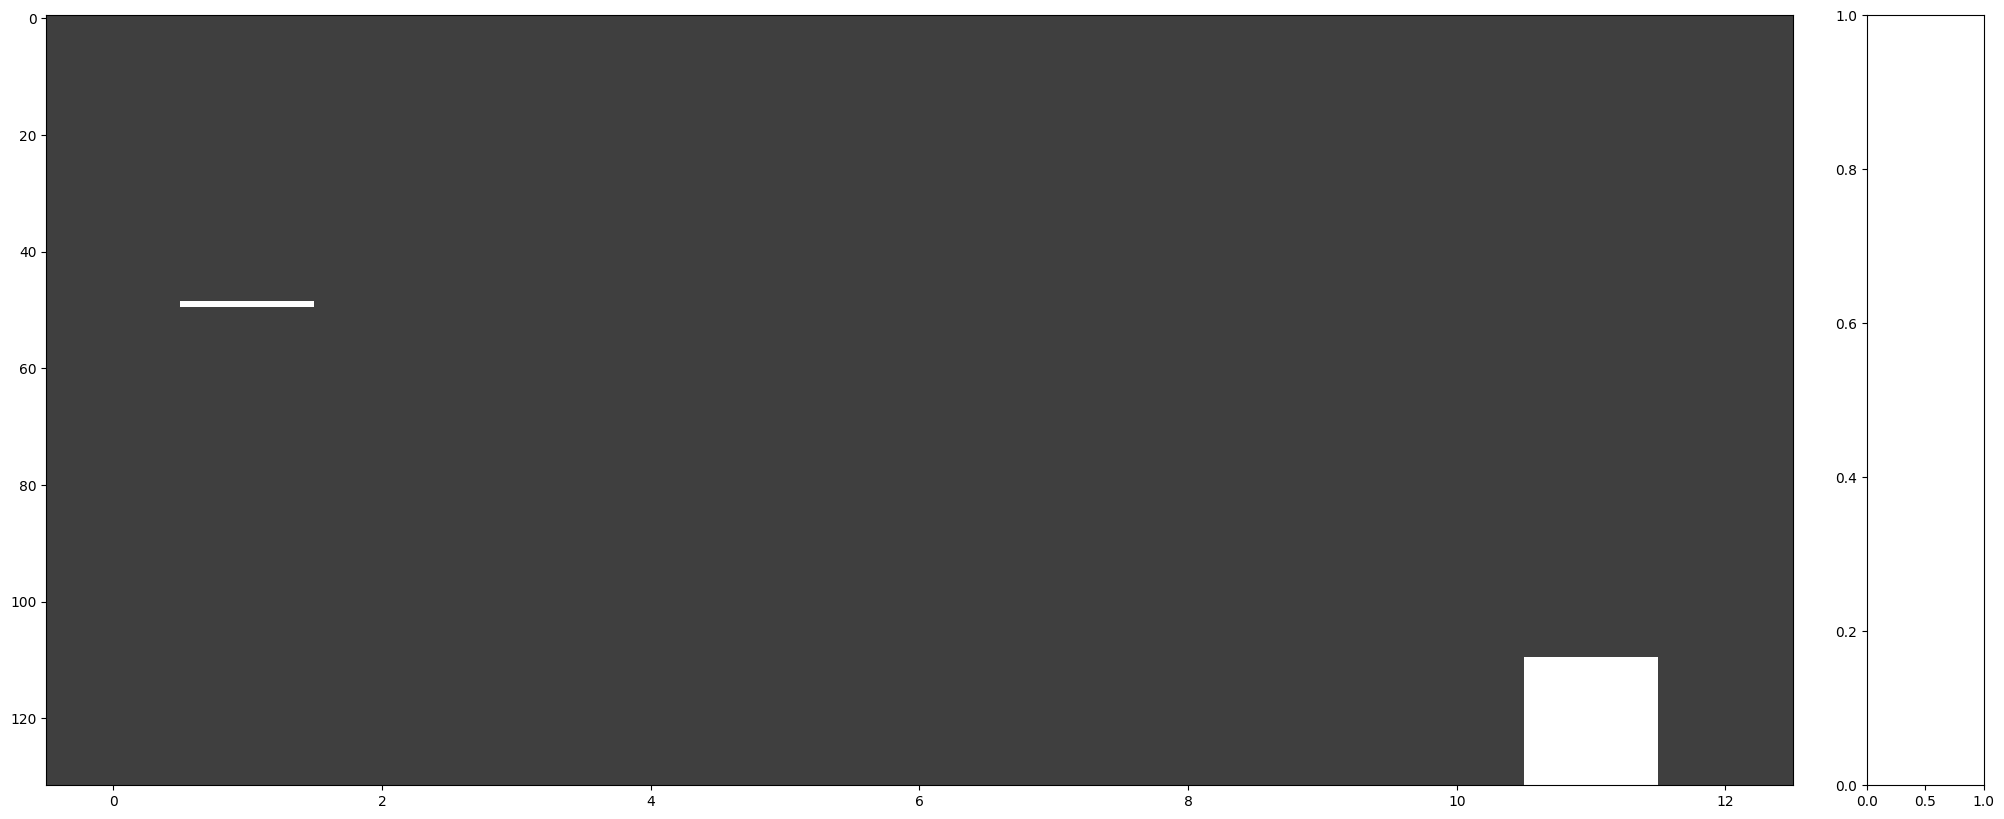

In [291]:
%matplotlib inline
print("GRAFICA #3: VALORES AUSENTES POR COLUMNA Y FILA")
mi.matrix(datos)


#### <span style="color:#20B2AA">   Análisis de los datos - Valores ausentes en la columna de clasificación.           <br>
4. De acuerdo con la información suministrada, calcula los valores ausentes de la columna
de clasificación (la última).  

***


In [172]:
print('Datos ausentes para la variable categorica:{} valores nulos.'.format(datos["AliveAt1"].isnull().sum()))

Datos ausentes para la variable categorica:58 valores nulos.


#### <span style="color:#20B2AA">   Análisis de los datos - Descartando atributos.           <br>
5. Antes del proceso de imputación, y en función de la distribución de NA’s, indicar si
sería conveniente eliminar alguna instancia o atributo. Razona tu respuesta.   <br>

Para ello consideramos la medida de correlación entre las variables o atributos.

***

In [164]:
corr_mat = datos.isnull().corr()
corr_mat

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
Survival,1.000000,0.704403,-0.024611,0.704403,0.228410,0.150999,0.186989,0.339860,-0.010837,0.339860,NaN,-0.055470,0.015146
StillAlive,0.704403,1.000000,-0.017336,1.000000,0.343978,0.244012,0.289775,0.494242,-0.007634,0.494242,NaN,-0.039073,0.098688
AgeAttack,-0.024611,-0.017336,1.000000,-0.017336,0.115916,-0.071045,0.083756,-0.035076,-0.017336,-0.035076,NaN,0.230713,0.144165
PericardEffu,0.704403,1.000000,-0.017336,1.000000,0.343978,0.244012,0.289775,0.494242,-0.007634,0.494242,NaN,-0.039073,0.098688
FracShort,0.228410,0.343978,0.115916,0.343978,1.000000,0.409260,0.727548,0.325535,-0.022192,0.325535,NaN,-0.113592,0.031017
EPSS,0.150999,0.244012,-0.071045,0.244012,0.409260,1.000000,0.496609,0.215207,-0.031284,0.215207,NaN,-0.160128,0.019675
LVDD,0.186989,0.289775,0.083756,0.289775,0.727548,0.496609,1.000000,0.266501,-0.026343,0.266501,NaN,-0.134840,0.009205
WMS,0.339860,0.494242,-0.035076,0.494242,0.325535,0.215207,0.266501,1.000000,0.494242,1.000000,NaN,-0.079057,0.110632
WMI,-0.010837,-0.007634,-0.017336,-0.007634,-0.022192,-0.031284,-0.026343,0.494242,1.000000,0.494242,NaN,-0.039073,-0.077350
Mult,0.339860,0.494242,-0.035076,0.494242,0.325535,0.215207,0.266501,1.000000,0.494242,1.000000,NaN,-0.079057,0.110632


<Axes: >

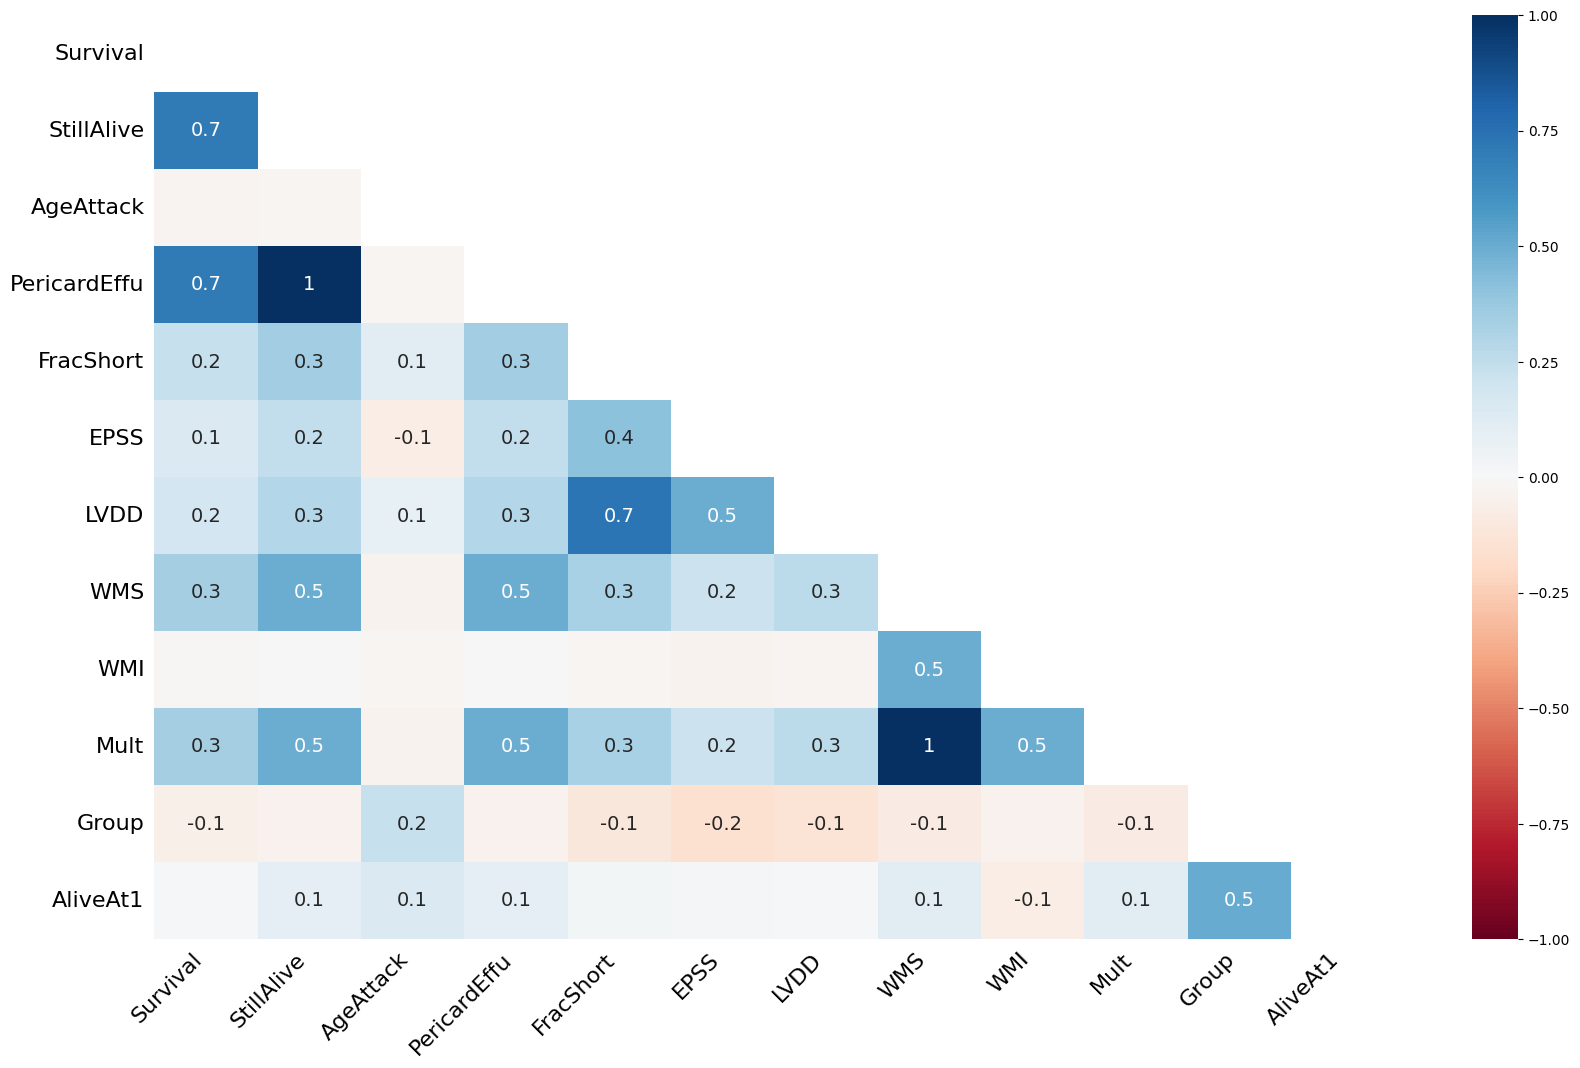

In [157]:
mi.heatmap(datos)

#### <span style="color:#20B2AA"> Consideraciones para eliminar las siguientes variables en función de los valores Nulos:<br>
1.- La variable "Name" se elimina, no tiene datos nulos, no significativa ya que a partir de ella no se puede explicar la correlación de datos faltantes. <br>
2.- La variable "Multi" se elimina porque tiene una correlación alta con la variable "VMS", "StillAlive" y "PericardEffu" por lo que "Mult" no estará <br>
aportando información relevante.<br>
3.- La variable PericardEffu es una variable binaria y tiene una correlación alta con la variable Survival que se refiere al número de meses que estuvo vivo <br>(variable cuantitativa continua) de la que depende la variable "AliveAt1" que es la variable de clasificación. <br>
Cualquiera de las dos podría eliminarse debido al grado de correlación, pera cada una aporta información de forma distinta a la variable respuesta y una <br>
no podría explicar con certeza la distribución de los datos faltantes de la otra.<br>
4.- La variable "LVDD" tiene un grado de correlación alta con las variables "FracShort" y "EPSS" por lo que puede estar representando datos redundantes y  <br>
las variables anteriores pueden portar suficiente información al modelo al eliminar "LVDD".<br>
5.- La variable "WMI" tiene una correlación fuerte con la variable "WMS" y al mismo tiempo una correlación muy baja con los valores ausentes de la <br>
variable objetivo. Además conocemos por la descripción de los datos que esta variable es la media de los valores de  "WMI", por tal razón la eliminamos. <br>
6.- Por los datos arrojados en la "Tabla de valores faltantes por columna" podemos determinar que sumados los datos faltantes de las variables "FracShort" y <br>
"EPSS" son iguales a los datos faltantes en la variable "WMS" en la suma total y de correlación entre otras variables. A su vez esta variable "WMS" tiene <br>
una correlación fuerte con las variables "StillAlive" y "PericardEffu", con lo que la variabilidad de los datos faltantes en esta variable "WMS" estarían <br>
explicados en las variables "StillAlive" y "PericardEffu".
6.- Group no aporta información sobre los datos faltantes ya que sus datos están asociados a la variable de objetivo. 

Bajo este análisis nos quedaríamos con las variables: Survival,	StillAlive,	AgeAttack,	PericardEffu, FracShort, EPSS y AliveAt1 como variable objetivo <br>
y eliminamos: Name, Multi, LVDD, WMI, WMS y Group.

In [176]:
from sklearn.decomposition import PCA

Otra forma de eliminar varibles es considerando el resultado de aplicar el Análisis de los Componentes Principales, ignorando la variable name y <br>
la variable objetivo (clase):<br>
Con esta técnica se puede determinar cuáles atributos o variables tienen menor importancia en la explicación de la variabilidad de los datos, y <br>
por lo tanto pueden ser eliminados sin afectar significativamente el rendimiento del modelo o el análisis posterior. <br>

<span style="color:#20B2AA">NOTA: Esta técnica no toma en cuenta los valores nulos pero nos permite identificar si el análisis anterior tiene coherencia. 

In [249]:
datosCp = datos.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]]
# Eliminar filas con NaN
datosCp = datosCp.dropna()
datosCp

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Group
0,11,0,71,0,0.260,9,4.600,14,1,1,1
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,1
2,16,0,55,0,0.260,4,3.420,14,1,1,1
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,1
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,1
...,...,...,...,...,...,...,...,...,...,...,...
105,24,0,59,0,0.17,14.3,5.49,13.5,1.50,0.643,2
106,25,0,57,0,0.228,9.7,4.29,11,1,0.786,2
107,24,0,57,0,0.036,7,4.12,13.5,1.23,0.786,2
108,.75,1,78,0,0.23,40,6.23,14,1.4,0.714,2


In [264]:
# Crear el objeto PCA y especificar el número de componentes a generar
pca = PCA(n_components=11)
# Aplicar PCA a los datos
pca.fit(datosCp)
# Transformar los datos para obtener los componentes principales
transformed_data = pca.transform(datosCp)

# Obtener los porcentajes de varianza explicada por cada componente principal
variance_ratios = pca.explained_variance_ratio_

# Crear un dataframe con los porcentajes de varianza explicada por cada variable
variance_df = pd.DataFrame(variance_ratios, columns=["Porcentaje de varianza explicada"], index=datosCp.columns)
suma = int((variance_df.iloc[0:4]['Porcentaje de varianza explicada'].sum())*100)
# Imprimir el dataframe
print('Seleccionamos los 5 primeros componentes que explican la varianza de los datos un {}%'.format(suma))
print("Se eliminan las variables: EPSS, LVDD, WMI, Mult y Group")
print('Tabla por componente:{}'.format(variance_df))

Seleccionamos los 5 primeros componentes que explican la varianza de los datos un 99%
Se eliminan las variables: EPSS, LVDD, WMI, Mult y Group
Tabla por componente:              Porcentaje de varianza explicada
Survival                              0.668870
StillAlive                            0.173928
AgeAttack                             0.111152
PericardEffu                          0.043957
FracShort                             0.000851
EPSS                                  0.000456
LVDD                                  0.000306
WMS                                   0.000265
WMI                                   0.000192
Mult                                  0.000020
Group                                 0.000005


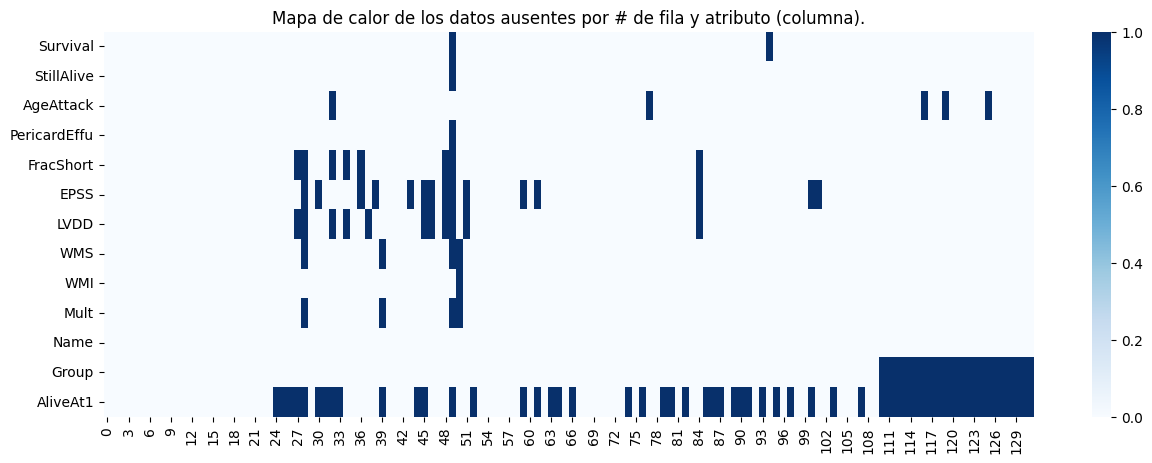

In [282]:
plt.subplots(figsize=(15,5))  
sns.heatmap(datos.isnull().transpose(), cmap = 'Blues')
plt.title("Mapa de calor de los datos ausentes por # de fila y atributo (columna).")
plt.show()

### <span style="color:#20B2AA">   Imputando los valores ausentes.           <br>
6. Imputar los valores ausentes aplicando una imputación por mediana y una imputación <br>
por KNN. Genera un dataset para cada uno de los tipos de imputación con los siguientes<br>
nombres: echo_mediana y echo_knn. Muestra los resultados de la imputación por<br>
pantalla. 

***

##### <span style="color:#20B2AA">   Tipos de datos           <br>

Pasos: <br>
1.- Eliminamos la columna Name ya que no contiene datos ausentes.<br>
2.- Convertimos los datos de tipo object al correspondiente.

In [332]:
datos = datos.drop('Name', axis=1)
datos

In [342]:
datos['Survival'] = ((pd.to_numeric(datos['Survival'], errors='coerce')).round(1)).astype('float')
datos['StillAlive'] = (datos['StillAlive'].astype('Int64')).astype('boolean')
datos['AgeAttack'] = ((pd.to_numeric(datos['AgeAttack'], errors='coerce')).round(0)).astype('Int64')
datos['PericardEffu'] = (datos['PericardEffu'].astype('Int64')).astype('boolean')
datos['FracShort'] = ((pd.to_numeric(datos['FracShort'], errors='coerce')).round(2)).astype('float')
datos['EPSS'] = ((pd.to_numeric(datos['EPSS'], errors='coerce')).round(2)).astype('float')
datos['LVDD'] = ((pd.to_numeric(datos['LVDD'], errors='coerce')).round(1)).astype('float')
datos['WMS'] = ((pd.to_numeric(datos['WMS'], errors='coerce')).round(2)).astype('float')
datos['WMI'] = ((pd.to_numeric(datos['WMI'], errors='coerce')).round(1)).astype('float')
datos['Mult'] = ((pd.to_numeric(datos['Mult'], errors='coerce')).round(1)).astype('float')
datos['Group'] = (datos['Group'].astype('Int64')).astype('boolean')

# Crear un diccionario de mapeo
mapping_dict = {"1": "VIVE", "0": "FALLECE"}
# Aplicar el mapeo a la columna "AliveAt1"
datos["AliveAt1"] = datos["AliveAt1"].map(mapping_dict).astype("category")



datos

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,11.0,False,71,False,0.26,9.00,4.6,14.0,1.0,1.0,name,True,FALLECE
1,19.0,False,72,False,0.38,6.00,4.1,14.0,1.7,0.6,name,True,FALLECE
2,16.0,False,55,False,0.26,4.00,3.4,14.0,1.0,1.0,name,True,FALLECE
3,57.0,False,60,False,0.25,12.06,4.6,16.0,1.4,0.8,name,True,FALLECE
4,19.0,True,57,False,0.16,22.00,5.8,18.0,2.2,0.6,name,True,FALLECE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,True,64,False,0.24,12.90,4.7,12.0,1.0,0.9,name,<NA>,NaN
128,41.0,False,64,False,0.28,5.40,5.5,11.0,1.1,0.7,name,<NA>,NaN
129,36.0,False,69,False,0.20,7.00,5.0,14.5,1.2,0.9,name,<NA>,NaN
130,22.0,False,57,False,0.14,16.10,4.4,15.0,1.4,0.8,name,<NA>,NaN


In [336]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survival      130 non-null    float64 
 1   StillAlive    131 non-null    boolean 
 2   AgeAttack     127 non-null    Int64   
 3   PericardEffu  131 non-null    boolean 
 4   FracShort     124 non-null    float64 
 5   EPSS          117 non-null    float64 
 6   LVDD          121 non-null    float64 
 7   WMS           128 non-null    float64 
 8   WMI           131 non-null    float64 
 9   Mult          128 non-null    float64 
 10  Group         110 non-null    boolean 
 11  AliveAt1      0 non-null      category
dtypes: Int64(1), boolean(3), category(1), float64(7)
memory usage: 9.5 KB


##### <span style="color:#20B2AA">   Imputando con sklearn           <br>
Vamos a imputar (rellenar) los valores faltantes o nulos en un conjunto de datos por mediana y una por KNN. <br>
Esta función de skelearn se utiliza principalmente para preprocesar los datos antes de aplicar un modelo de aprendizaje automático.
Pasos:
1.- Imputamos los datos tipo Float (continuos)
2.- Imputamos los datos tipo Int (enteros) y booleanos.
3.- Imputamos la variable categorica

In [376]:
# Mean Imputation 
echo_mediana = datos.copy()
si = SimpleImputer(strategy='median') #reemplazará los datos faltantes sobre la mediana de los valores de la columna
echo_mediana['Survival'] = si.fit_transform(echo_mediana['Survival'].values.reshape(-1,1))
echo_mediana['FracShort'] = si.fit_transform(echo_mediana['FracShort'].values.reshape(-1,1))
echo_mediana['EPSS'] = si.fit_transform(echo_mediana['EPSS'].values.reshape(-1,1))
echo_mediana['LVDD'] = si.fit_transform(echo_mediana['LVDD'].values.reshape(-1,1))
echo_mediana['WMS'] = si.fit_transform(echo_mediana['WMS'].values.reshape(-1,1))
echo_mediana['WMI'] = si.fit_transform(echo_mediana['WMI'].values.reshape(-1,1))
echo_mediana['Mult'] = si.fit_transform(echo_mediana['Mult'].values.reshape(-1,1))

echo_mediana

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,11.0,False,71,False,0.26,9.00,4.6,14.0,1.0,1.0,name,True,FALLECE
1,19.0,False,72,False,0.38,6.00,4.1,14.0,1.7,0.6,name,True,FALLECE
2,16.0,False,55,False,0.26,4.00,3.4,14.0,1.0,1.0,name,True,FALLECE
3,57.0,False,60,False,0.25,12.06,4.6,16.0,1.4,0.8,name,True,FALLECE
4,19.0,True,57,False,0.16,22.00,5.8,18.0,2.2,0.6,name,True,FALLECE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,True,64,False,0.24,12.90,4.7,12.0,1.0,0.9,name,<NA>,NaN
128,41.0,False,64,False,0.28,5.40,5.5,11.0,1.1,0.7,name,<NA>,NaN
129,36.0,False,69,False,0.20,7.00,5.0,14.5,1.2,0.9,name,<NA>,NaN
130,22.0,False,57,False,0.14,16.10,4.4,15.0,1.4,0.8,name,<NA>,NaN


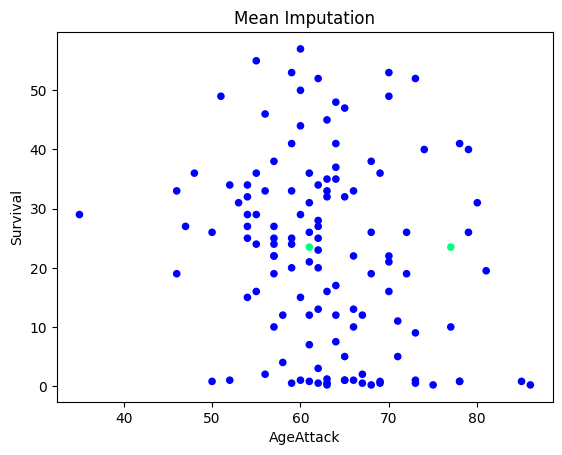

In [377]:
null_values = datos['Survival'].isnull()

fig = plt.Figure()
fig = echo_mediana.plot(x="AgeAttack", y='Survival', kind='scatter', c=null_values, cmap='winter', title='Mean Imputation', colorbar=False)

In [378]:
si = SimpleImputer(strategy='most_frequent', missing_values=pd.NA) #Imputamos Enteros y Booleanos
echo_mediana['AgeAttack'] = si.fit_transform(echo_mediana['AgeAttack'].values.reshape(-1,1))

echo_mediana['StillAlive'] = si.fit_transform(echo_mediana['StillAlive'].values.reshape(-1,1))
echo_mediana['PericardEffu'] = si.fit_transform(echo_mediana['PericardEffu'].values.reshape(-1,1))
echo_mediana['Group'] = si.fit_transform(echo_mediana['Group'].values.reshape(-1,1))

echo_mediana.head()

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,11.0,False,71,False,0.26,9.00,4.6,14.0,1.0,1.0,name,True,FALLECE
1,19.0,False,72,False,0.38,6.00,4.1,14.0,1.7,0.6,name,True,FALLECE
2,16.0,False,55,False,0.26,4.00,3.4,14.0,1.0,1.0,name,True,FALLECE
3,57.0,False,60,False,0.25,12.06,4.6,16.0,1.4,0.8,name,True,FALLECE
4,19.0,True,57,False,0.16,22.00,5.8,18.0,2.2,0.6,name,True,FALLECE


In [379]:
echo_mediana['AliveAt1'] = si.fit_transform(echo_mediana['AliveAt1'].values.reshape(-1,1)) #Imputamos la variable categorica

In [356]:
echo_mediana

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,11.0,False,71,False,0.26,9.00,4.6,14.0,1.0,1.0,name,True,FALLECE
1,19.0,False,72,False,0.38,6.00,4.1,14.0,1.7,0.6,name,True,FALLECE
2,16.0,False,55,False,0.26,4.00,3.4,14.0,1.0,1.0,name,True,FALLECE
3,57.0,False,60,False,0.25,12.06,4.6,16.0,1.4,0.8,name,True,FALLECE
4,19.0,True,57,False,0.16,22.00,5.8,18.0,2.2,0.6,name,True,FALLECE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,True,64,False,0.24,12.90,4.7,12.0,1.0,0.9,name,True,FALLECE
128,41.0,False,64,False,0.28,5.40,5.5,11.0,1.1,0.7,name,True,FALLECE
129,36.0,False,69,False,0.20,7.00,5.0,14.5,1.2,0.9,name,True,FALLECE
130,22.0,False,57,False,0.14,16.10,4.4,15.0,1.4,0.8,name,True,FALLECE


In [380]:
echo_mediana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survival      132 non-null    float64
 1   StillAlive    132 non-null    object 
 2   AgeAttack     132 non-null    object 
 3   PericardEffu  132 non-null    object 
 4   FracShort     132 non-null    float64
 5   EPSS          132 non-null    float64
 6   LVDD          132 non-null    float64
 7   WMS           132 non-null    float64
 8   WMI           132 non-null    float64
 9   Mult          132 non-null    float64
 10  Name          132 non-null    object 
 11  Group         132 non-null    object 
 12  AliveAt1      132 non-null    object 
dtypes: float64(7), object(6)
memory usage: 13.5+ KB


In [381]:
# Imputación KNN
echo_knn = datos.copy()
# seleccionar las columnas a imputar
cols = ['Survival', 'StillAlive', 'AgeAttack', 'PericardEffu', 'FracShort', 
        'EPSS', 'LVDD', 'WMS', 'WMI', 'Mult', 'Group']
# crear un objeto KNNImputer con k=5
# knni = KNNImputer(n_neighbors=5)
knni = KNNImputer(n_neighbors=2, weights="uniform")
# echo_knn['Survival'] = knni.fit_transform(echo_knn['Survival'].values.reshape(-1,1))
# imputar los valores faltantes en el dataframe
echo_knn[cols] = knni.fit_transform(echo_knn[cols])
echo_knn.head()

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,11.0,0.0,71.0,0.0,0.26,9.00,4.6,14.0,1.0,1.0,name,1.0,FALLECE
1,19.0,0.0,72.0,0.0,0.38,6.00,4.1,14.0,1.7,0.6,name,1.0,FALLECE
2,16.0,0.0,55.0,0.0,0.26,4.00,3.4,14.0,1.0,1.0,name,1.0,FALLECE
3,57.0,0.0,60.0,0.0,0.25,12.06,4.6,16.0,1.4,0.8,name,1.0,FALLECE
4,19.0,1.0,57.0,0.0,0.16,22.00,5.8,18.0,2.2,0.6,name,1.0,FALLECE


In [382]:
echo_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survival      132 non-null    float64 
 1   StillAlive    132 non-null    float64 
 2   AgeAttack     132 non-null    float64 
 3   PericardEffu  132 non-null    float64 
 4   FracShort     132 non-null    float64 
 5   EPSS          132 non-null    float64 
 6   LVDD          132 non-null    float64 
 7   WMS           132 non-null    float64 
 8   WMI           132 non-null    float64 
 9   Mult          132 non-null    float64 
 10  Name          132 non-null    object  
 11  Group         132 non-null    float64 
 12  AliveAt1      74 non-null     category
dtypes: category(1), float64(11), object(1)
memory usage: 12.8+ KB


##### <span style="color:#20B2AA">   Comparamos la imputación en la fila con más valores nulos           <br>
En este caso comparamos el resultado de ambas técnicas. <br>

In [383]:
printImputer = pd.DataFrame({'Observaciones':datos.iloc[49],'Mediana_Imputer': echo_mediana.iloc[49], 'KNN_Imputer':echo_knn.iloc[49]})
printImputer

,Observaciones,Mediana_Imputer,KNN_Imputer
Survival,NaN,23.5,5.0
StillAlive,<NA>,False,1.0
AgeAttack,77,77,77.0
PericardEffu,<NA>,False,0.0
FracShort,NaN,0.205,0.195
EPSS,NaN,11.0,17.7
LVDD,NaN,4.6,4.5
WMS,NaN,14.0,19.5
WMI,2.0,2.0,2.0
Mult,NaN,0.8,0.7


### <span style="color:#20B2AA">   Estandarizando.           <br>
7. Estandarizar las columnas numéricas utilizando los métodos min-max y z-score para
cada uno de los datasets imputados. Como resultado, se generarán 4 datasets:
echo_mediana_minmax, echo_mediana_z, echo_knn_minmax y echo_knn_z.

***

In [384]:
echo_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survival      132 non-null    float64 
 1   StillAlive    132 non-null    float64 
 2   AgeAttack     132 non-null    float64 
 3   PericardEffu  132 non-null    float64 
 4   FracShort     132 non-null    float64 
 5   EPSS          132 non-null    float64 
 6   LVDD          132 non-null    float64 
 7   WMS           132 non-null    float64 
 8   WMI           132 non-null    float64 
 9   Mult          132 non-null    float64 
 10  Name          132 non-null    object  
 11  Group         132 non-null    float64 
 12  AliveAt1      74 non-null     category
dtypes: category(1), float64(11), object(1)
memory usage: 12.8+ KB


In [385]:
colsNumericasMediana = ['Survival',   'FracShort', 'EPSS', 'LVDD', 'WMS', 'WMI', 'Mult']
colsNumericasKNN = ['Survival', 'StillAlive', 'AgeAttack', 'PericardEffu', 'FracShort', 
        'EPSS', 'LVDD', 'WMS', 'WMI', 'Mult', 'Group']

#### MIN-MAX

In [386]:
# Aplicar min-max
echo_mediana_minmax = echo_mediana.copy()
scaler_minmax = MinMaxScaler()
echo_mediana_minmax[colsNumericasMediana] = scaler_minmax.fit_transform(echo_mediana_minmax[colsNumericasMediana])
echo_mediana_minmax.head()

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,0.192982,False,71,False,0.416667,0.2250,0.511111,0.324324,0.00,0.473684,name,True,FALLECE
1,0.333333,False,72,False,0.616667,0.1500,0.400000,0.324324,0.35,0.263158,name,True,FALLECE
2,0.280702,False,55,False,0.416667,0.1000,0.244444,0.324324,0.00,0.473684,name,True,FALLECE
3,1.000000,False,60,False,0.400000,0.3015,0.511111,0.378378,0.20,0.368421,name,True,FALLECE
4,0.333333,True,57,False,0.250000,0.5500,0.777778,0.432432,0.60,0.263158,name,True,FALLECE


In [391]:
# Aplicar min-max
echo_knn_minmax = echo_knn.copy()
scaler_minmax = MinMaxScaler()
echo_knn_minmax[colsNumericasKNN] = scaler_minmax.fit_transform(echo_knn_minmax[colsNumericasKNN])
echo_knn_minmax.head()

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,0.192982,0.0,0.705882,0.0,0.416667,0.2250,0.511111,0.324324,0.00,0.473684,name,0.0,FALLECE
1,0.333333,0.0,0.725490,0.0,0.616667,0.1500,0.400000,0.324324,0.35,0.263158,name,0.0,FALLECE
2,0.280702,0.0,0.392157,0.0,0.416667,0.1000,0.244444,0.324324,0.00,0.473684,name,0.0,FALLECE
3,1.000000,0.0,0.490196,0.0,0.400000,0.3015,0.511111,0.378378,0.20,0.368421,name,0.0,FALLECE
4,0.333333,1.0,0.431373,0.0,0.250000,0.5500,0.777778,0.432432,0.60,0.263158,name,0.0,FALLECE


### Z-SCORE

In [389]:
echo_mediana_z = echo_mediana.copy()
scaler_zscore = StandardScaler()
echo_mediana_z[colsNumericasMediana] = scaler_zscore.fit_transform(echo_mediana_z[colsNumericasMediana])

In [390]:
echo_mediana_z.head()

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,-0.714584,False,71,False,0.423737,-0.438268,-0.199307,-0.086296,-0.850488,1.075824,name,True,FALLECE
1,-0.204305,False,72,False,1.580976,-0.871860,-0.844124,-0.086296,0.705652,-0.917282,name,True,FALLECE
2,-0.395660,False,55,False,0.423737,-1.160922,-1.746867,-0.086296,-0.850488,1.075824,name,True,FALLECE
3,2.219521,False,60,False,0.327300,0.003996,-0.199307,0.319946,0.038735,0.079271,name,True,FALLECE
4,-0.204305,True,57,False,-0.540630,1.440633,1.348253,0.726188,1.817181,-0.917282,name,True,FALLECE


In [392]:
echo_knn_z = echo_knn.copy()
scaler_minmax = StandardScaler()
echo_knn_z[colsNumericasKNN] = scaler_minmax.fit_transform(echo_knn_z[colsNumericasKNN])
echo_knn_z.head()

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,-0.707056,-0.707107,0.940248,-0.471405,0.434731,-0.460292,-0.224674,-0.084694,-0.857321,1.090275,name,0.0,FALLECE
1,-0.201640,-0.707107,1.060280,-0.471405,1.574821,-0.881509,-0.855673,-0.084694,0.680862,-0.874452,name,0.0,FALLECE
2,-0.391171,-0.707107,-0.980258,-0.471405,0.434731,-1.162321,-1.739072,-0.084694,-0.857321,1.090275,name,0.0,FALLECE
3,2.199087,-0.707107,-0.380100,-0.471405,0.339724,-0.030650,-0.224674,0.318211,0.021641,0.107911,name,0.0,FALLECE
4,-0.201640,1.414214,-0.740195,-0.471405,-0.515343,1.364984,1.289724,0.721116,1.779565,-0.874452,name,0.0,FALLECE


### <span style="color:#20B2AA">   Ficheros Imputación y Estandarización           <br>
8. Generar un fichero CSV resultado para cada una de las diferentes técnicas de
imputación y estandarización utilizadas. Los nombres de los ficheros tendrán el nombre
del dataset con la extensión .csv. 

***

In [ ]:
# guardar el dataframe como archivo CSV

#Imputaciones
echo_mediana.to_csv('echo_mediana.csv', index=False)
echo_knn.to_csv('echo_knn.csv', index=False)

#Estandarizaciones

#MIN-MAX
echo_mediana_minmax.to_csv('echo_mediana_minmax.csv', index=False)
echo_knn_minmax.to_csv('echo_knn_minmax.csv', index=False)

#Z-SCORE
echo_mediana_z.to_csv('echo_mediana_z.csv', index=False)
echo_knn_z.to_csv('echo_knn_z.csv', index=False)

### <span style="color:#20B2AA">   Balanceando echo_knn_z           <br>
9. Para el dataset echo_knn_z, balancea los datos en base a la variable AliveAt1,
empleando los métodos de submuestreo, sobremuestreo y SMOTE. 

***

Podemos ver que la clase `AliveAt1` está claramente desbalanceada hacia las personas que FALLECEN:

In [393]:
print(datos['AliveAt1'].value_counts())

FALLECE    50
VIVE       24
Name: AliveAt1, dtype: int64


Primero, creemos dos conjuntos con los datos de la clase `AliveAt1` por separado, uno con las personas que viven y otra con las que fallecen:

In [402]:
vive = echo_knn_z[echo_knn_z['AliveAt1'] == "VIVE"]
fallece  = echo_knn_z[echo_knn_z['AliveAt1'] == "FALLECE"]
print(vive.shape)
print(fallece.shape)

(24, 13)
(50, 13)


Podemos balancear el conjunto de datos haciendo un submuestreo a través de la función `resample` de `sklearn.utils`:

In [403]:
echo_knn_z_submuestreo = resample(fallece, replace=True, n_samples=len(vive), random_state=42)

print(echo_knn_z_submuestreo.shape)

(24, 13)


Para generar el conjunto de datos balanceado simplemente concatenamos:

In [404]:
echo_knn_z_submuestreo = pd.concat([echo_knn_z_submuestreo, vive])
echo_knn_z_submuestreo.head()

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
72,0.430130,-0.707107,-0.380100,-0.471405,-0.895373,-0.291805,-0.603273,0.116759,0.680862,-0.874452,name,0.0,FALLECE
56,1.440962,-0.707107,-0.020005,-0.471405,-0.610351,0.101332,-0.224674,-0.286146,-0.637580,0.599093,name,0.0,FALLECE
18,-0.012109,1.414214,0.340090,-0.471405,-1.180396,0.662955,1.289724,-1.293409,-0.198099,-1.856816,name,0.0,FALLECE
81,0.303776,-0.707107,-1.100290,2.121320,-1.370411,0.634874,-0.729473,0.721116,0.241382,0.599093,name,0.0,FALLECE
7,1.756847,-0.707107,-0.380100,-0.471405,1.099783,-0.600698,0.532525,-0.084694,-0.857321,1.090275,name,0.0,FALLECE


Se puede hacer un sobremuestreo de una forma similar:

In [406]:
echo_knn_z_sobremuestreo = resample(vive, replace=True, n_samples=len(fallece), random_state=42)

print(echo_knn_z_sobremuestreo.shape)

(50, 13)


Para generar el conjunto de datos balanceado simplemente concatenamos:

In [407]:
echo_knn_z_sobremuestreo = pd.concat([echo_knn_z_sobremuestreo, fallece])
echo_knn_z_sobremuestreo.head()

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
21,-1.351462,1.414214,2.620691,2.121320,-0.325329,0.943766,0.911124,-0.118941,0.021641,-0.383271,name,0.0,VIVE
98,-1.086118,1.414214,0.220058,2.121320,-0.515343,-0.530495,0.911124,0.318211,0.021641,0.107911,name,0.0,VIVE
70,-1.389368,1.414214,2.740723,-0.471405,0.054701,-0.010993,0.532525,1.929831,1.779565,0.107911,name,0.0,VIVE
48,-1.389368,1.414214,-0.020005,2.121320,-0.467840,1.042050,0.280125,1.728379,1.999305,-0.383271,name,0.0,VIVE
22,-1.370415,1.414214,1.180311,-0.471405,0.149709,0.063422,1.668323,-1.394135,0.241382,-1.856816,name,0.0,VIVE


Para utilizar `SMOTE`, primero instalamos la librería `imbalanced-learn`:
Paso 1: Seleccionamos las variables no categoricas ni booleanas

In [420]:
X = echo_knn_z.filter(["Survival", "StillAlive", "AgeAttack", "PericardEffu", "FracShort", "EPSS", "LVDD", "WMS", "WMI", "Mult", "Group"], axis=1).copy()
y = echo_knn_z.filter(['AliveAt1'], axis=1).copy()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survival      132 non-null    float64
 1   StillAlive    132 non-null    float64
 2   AgeAttack     132 non-null    float64
 3   PericardEffu  132 non-null    float64
 4   FracShort     132 non-null    float64
 5   EPSS          132 non-null    float64
 6   LVDD          132 non-null    float64
 7   WMS           132 non-null    float64
 8   WMI           132 non-null    float64
 9   Mult          132 non-null    float64
 10  Group         132 non-null    float64
dtypes: float64(11)
memory usage: 11.5 KB


Para utilizar SMOTE, creamos una instancia y la aplicamos al dataset. Sin embargo, para manejar valores NaN, creamos un pipeline que primero aplica SimpleImputer de sklearn y luego SMOTE.


In [419]:
# transform the dataset
smote = SMOTE()
# Es necesario este pipeline para dar soporte a los NaN. Por defecto smote no los soporta.
smote_enn = make_pipeline(SimpleImputer(), SMOTEENN(smote=smote))
A, b = smote_enn.fit_resample(X, y)
print(A.shape)
print(b.shape)

TypeError: '<' not supported between instances of 'float' and 'str'

In [421]:
# seleccionar las columnas adecuadas
X = echo_knn_z[['Survival', 'StillAlive', 'AgeAttack', 'PericardEffu', 'FracShort', 'EPSS', 'LVDD', 'WMS', 'WMI', 'Mult', 'Group']]
y = echo_knn_z['AliveAt1']

# transformar el dataset
smote = SMOTE()
# se crea el pipeline para dar soporte a los NaN y SMOTE
smote_enn = make_pipeline(SimpleImputer(), SMOTEENN(smote=smote))
A, b = smote_enn.fit_resample(X, y)
print(A.shape)
print(b.shape)

TypeError: '<' not supported between instances of 'float' and 'str'

### <span style="color:#20B2AA">  Ficheros sub_muestreo          <br>
10. Genera un fichero echo_knn_z_submuestreo, echo_knn_z_sobremuestreo, y
echo_knn_z_smote

***